<a href="https://colab.research.google.com/github/2311795/Maxwell-Text-Classification/blob/main/Matrix_Response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Label Job Description Classification with BERT, SMOTEENN, and Ensemble Models

This project implements a multi-label classification pipeline to classify job descriptions into multiple categories based on responses to several questions. The pipeline incorporates BERT embeddings for text processing, SMOTEENN for handling imbalanced datasets, and various machine learning models including Random Forest, Gradient Boosting, and XGBoost. Model interpretability is achieved using SHAP (SHapley Additive exPlanations).

#  **Code 1**: Uses the original dataset (`Matrix.csv`).

1.   List item
2.   List item



<ipython-input-2-aadc3d1d74f4>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])  # Encode the target column
<ipython-input-2-aadc3d1d74f4>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])  # Encode the target column
<ipython-input-2-aadc3d1d74f4>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best hyperparameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None, 'classifier__bootstrap': False}
Cross-validation accuracy: 0.7972222222222223
Type of shap_values_rf: <class 'numpy.ndarray'>
Shape of shap_values_rf: (44, 768, 2)
Shape of X_train: (44, 768)


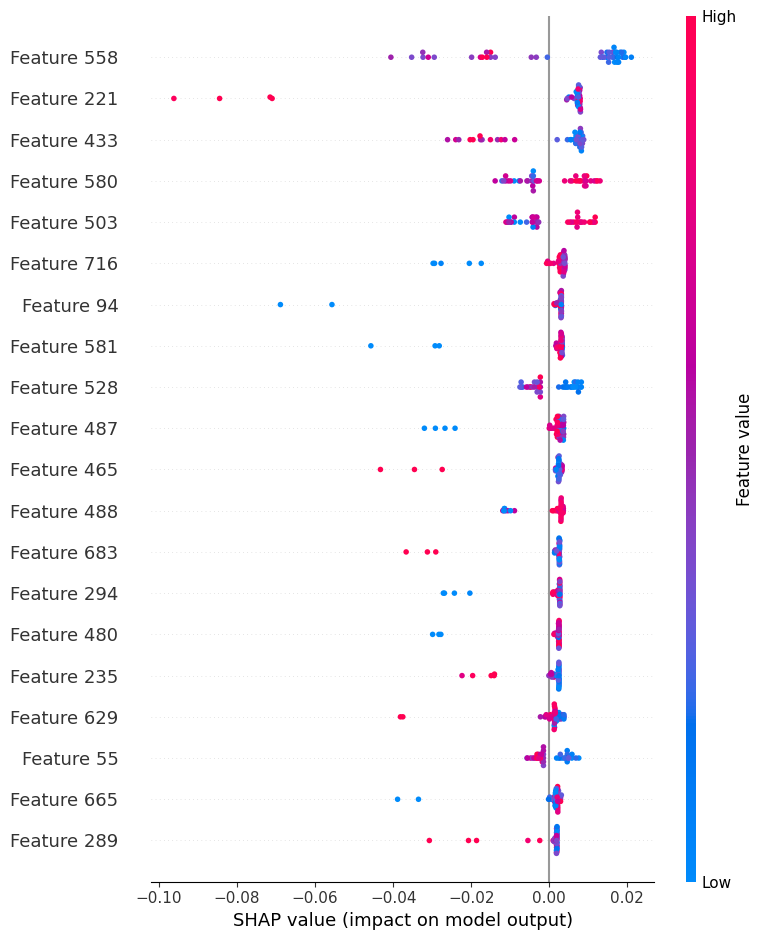

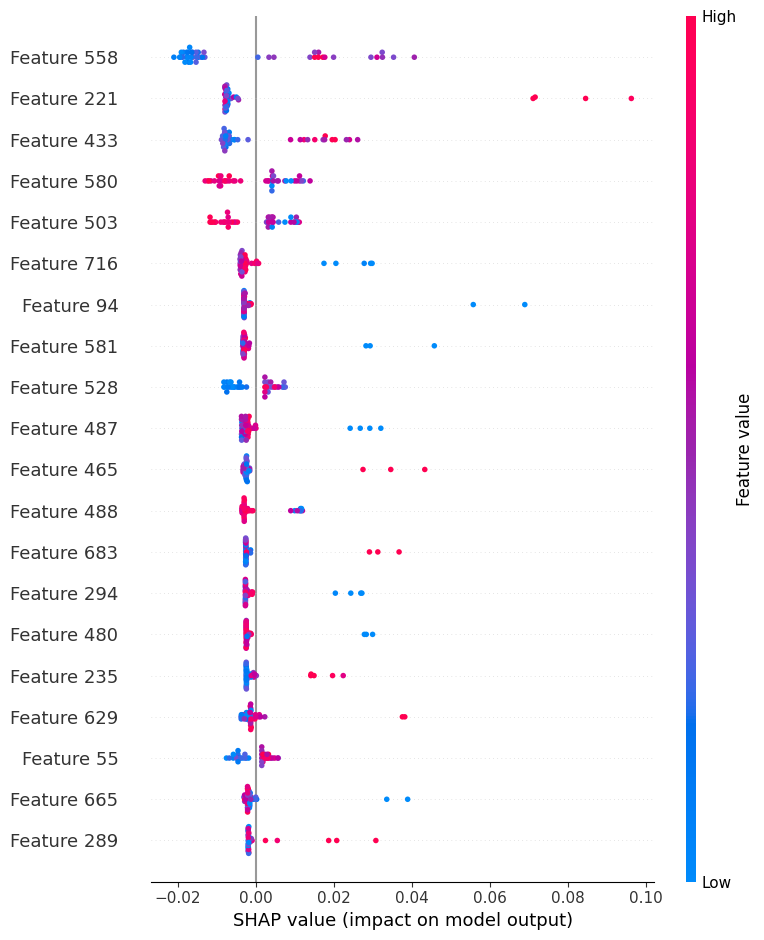

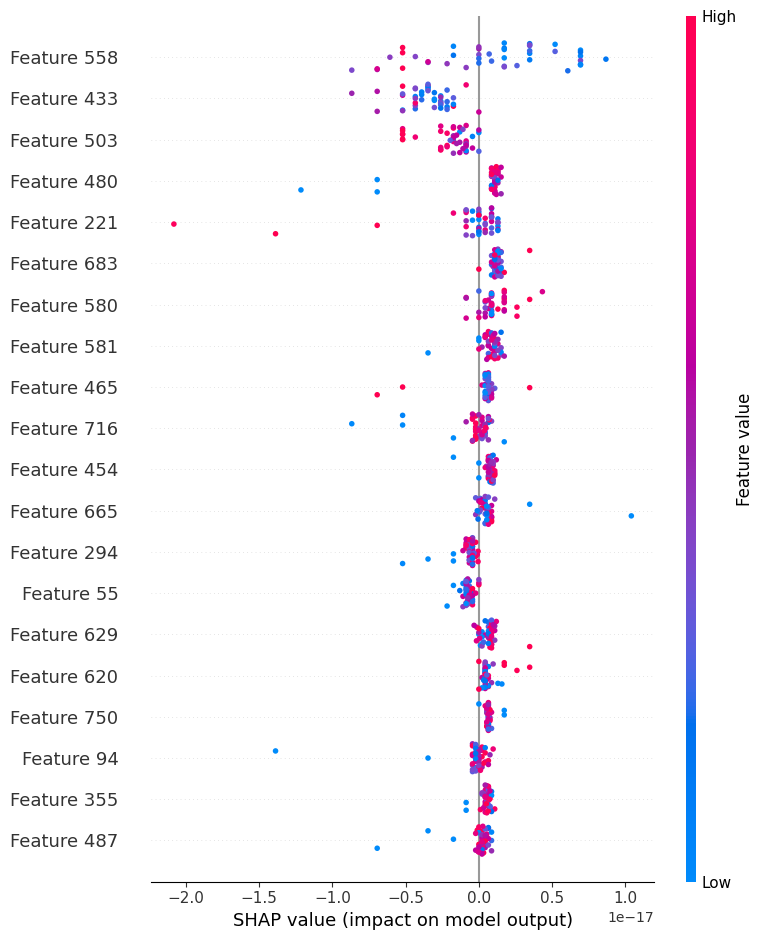

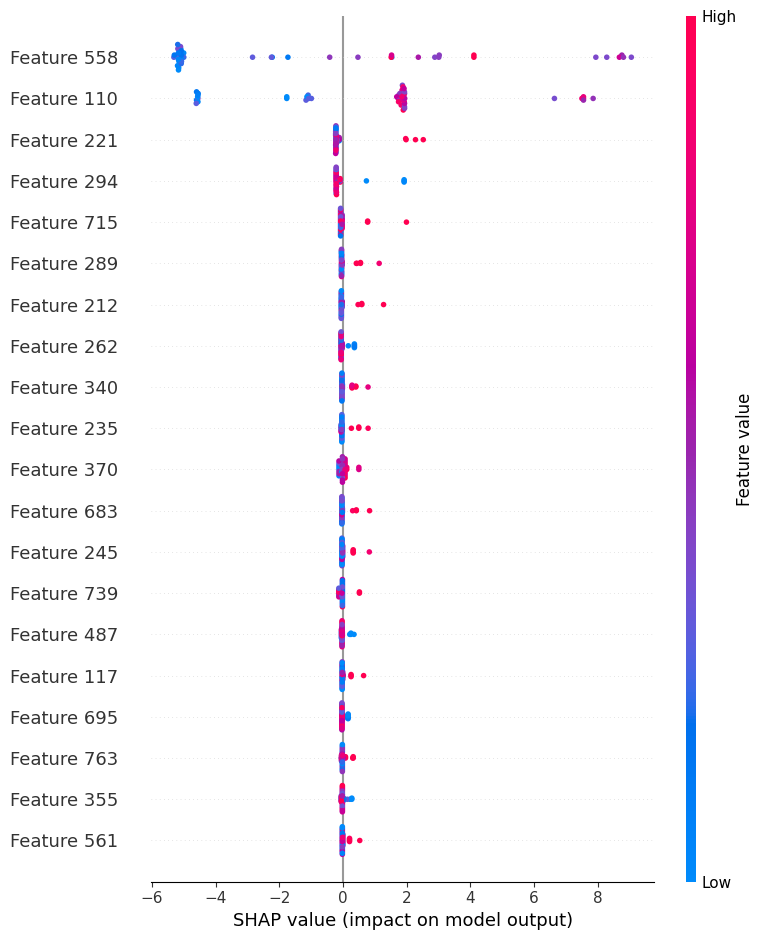

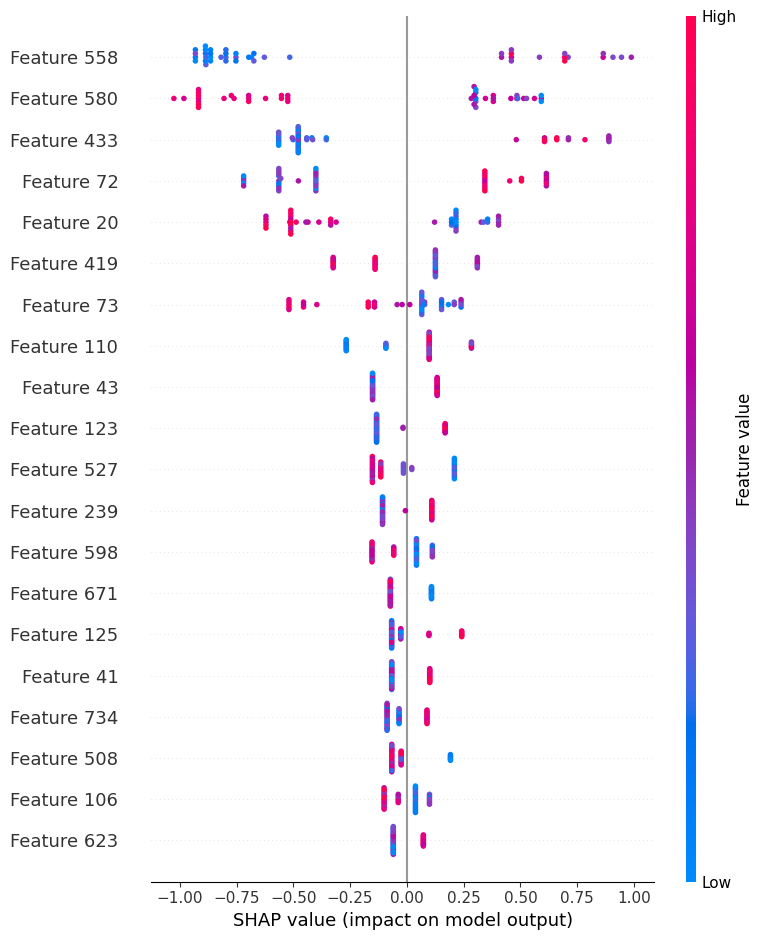

Prediction for Question 12: C
Prediction for Question 13: B
Prediction for Question 14: A
Prediction for Question 15: A
Metrics for Question 12:
Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score    support
C              0.750000  0.750000  0.750000   8.000000
D              0.500000  0.500000  0.500000   4.000000
accuracy       0.666667  0.666667  0.666667   0.666667
macro avg      0.625000  0.625000  0.625000  12.000000
weighted avg   0.666667  0.666667  0.666667  12.000000
Confusion Matrix:
[[6 2]
 [2 2]]


Metrics for Question 13:
Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score    support
B              0.750000  0.750000  0.750000   8.000000
C              0.500000  0.666667  0.571429   3.000000
D              0.000000  0.000000  0.000000   1.000000
accuracy       0.666667  0.666667  0.666667   0.666667
macro avg      0.416667  0.472222  0.440476  12.000000
weighted avg   0.625000  0.6666

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
# Import necessary libraries
# SHAP is used for model interpretability, Pandas for data manipulation, and Scikit-learn for machine learning tasks.
!pip install shap
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
import numpy as np  # For numerical operations
from transformers import BertTokenizer, BertModel  # For BERT embeddings
import torch  # For PyTorch operations, as BERT is based on PyTorch
from imblearn.combine import SMOTEENN  # For handling imbalanced datasets with a combination of SMOTE and ENN
from imblearn.pipeline import Pipeline as ImbPipeline  # For creating pipelines with imbalanced-learn components
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier  # Classifiers and ensemble models
from sklearn.model_selection import RandomizedSearchCV, cross_val_score  # For hyperparameter tuning and cross-validation
from sklearn.linear_model import LogisticRegression  # Logistic Regression model, used as a final estimator in stacking
from xgboost import XGBClassifier  # XGBoost classifier, a powerful gradient boosting model
import shap  # For model interpretability using SHAP values

# Step 1: Load the dataset
# The dataset is expected to be a CSV file containing job descriptions and responses to several questions.
file_path = 'Matrix.csv'  # Update with your actual file path
data = pd.read_csv(file_path)

# Strip any trailing spaces from column names to prevent errors during data manipulation
data.columns = data.columns.str.strip()

# Prepare the data for model training
X = data['Job description']  # Features: job descriptions
y = data[['Question 12', 'Question 13', 'Question 14', 'Question 15']]  # Targets: responses to the questions

# Step 2: Encode the target variables
# The target variables are categorical, so we encode them using LabelEncoder to convert them into numerical form.
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # Dictionary to store label encoders for each target column
for column in y.columns:
    le = LabelEncoder()  # Initialize a LabelEncoder for each target column
    y[column] = le.fit_transform(y[column])  # Encode the target column
    label_encoders[column] = le  # Store the LabelEncoder for later use

# Step 3: Convert job descriptions to BERT embeddings
# BERT (Bidirectional Encoder Representations from Transformers) is used to convert the text data into embeddings.

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def embed_text(text):
    """
    Converts a given text into BERT embeddings.

    Args:
    text (str): The input text to embed.

    Returns:
    np.ndarray: A numpy array representing the BERT embedding of the input text.
    """
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():  # Disable gradient calculations for inference
        outputs = bert_model(**inputs)
    return outputs.pooler_output.detach().numpy().flatten()  # Return the flattened pooler output

# Convert all job descriptions to BERT embeddings
X_bert = np.array([embed_text(desc) for desc in X])

# Step 4: Split the data into training and testing sets
# The data is split into training (80%) and testing (20%) sets for model evaluation.
X_train, X_test, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42)

# Step 5: Create the pipeline with SMOTEENN and a classifier
# SMOTEENN is a combination of over-sampling (SMOTE) and under-sampling (ENN) techniques to handle class imbalance.
pipeline = ImbPipeline([
    ('over_under', SMOTEENN(random_state=42)),  # Address class imbalance
    ('classifier', RandomForestClassifier(random_state=42))  # Initial classifier: Random Forest
])

# Step 6: Hyperparameter tuning using RandomizedSearchCV
# RandomizedSearchCV is used for hyperparameter tuning, searching over specified parameter ranges.
param_dist = {
    'classifier__n_estimators': [50, 100, 200, 500],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'classifier__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Perform RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Conduct the search for a specific question (e.g., Question 12)
random_search.fit(X_train, y_train['Question 12'])
best_rf_model = random_search.best_estimator_  # Store the best model from the search
print(f"Best hyperparameters: {random_search.best_params_}")

# Step 7: Cross-validation and Stacking
# Stacking is an ensemble method where multiple models are trained and their predictions are combined by a final estimator.
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),  # Random Forest classifier
    ('gb', GradientBoostingClassifier(random_state=42)),  # Gradient Boosting classifier
    ('xgb', XGBClassifier(random_state=42, eval_metric='mlogloss'))  # XGBoost classifier with a specified evaluation metric
]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())  # Use Logistic Regression as the final estimator

# Perform cross-validation to evaluate the stacking classifier for 'Question 12'
cross_val_scores = cross_val_score(stacking_clf, X_train, y_train['Question 12'], cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {np.mean(cross_val_scores)}")

# Train the final stacking model on the full training set
stacking_clf.fit(X_train, y_train['Question 12'])

# Step 8: Model Interpretation using SHAP for Multi-Class Models
# SHAP (SHapley Additive exPlanations) is used to explain the output of machine learning models.

# Extract the RandomForest model from the best pipeline
rf_model_in_pipeline = best_rf_model.named_steps['classifier']

# Fit the RandomForest model (if not already done)
rf_model_in_pipeline.fit(X_train, y_train['Question 12'])

# Generate SHAP values for the RandomForest model
explainer_rf = shap.TreeExplainer(rf_model_in_pipeline)
shap_values_rf = explainer_rf.shap_values(X_train)

# Inspect SHAP values structure for understanding the dimensionality
print(f"Type of shap_values_rf: {type(shap_values_rf)}")
print(f"Shape of shap_values_rf: {shap_values_rf.shape}")
print(f"Shape of X_train: {X_train.shape}")

# Option 1: Plot SHAP values for a specific class (e.g., class 0)
shap_values_class_0 = shap_values_rf[:, :, 0]
shap.summary_plot(shap_values_class_0, X_train, feature_names=[f'Feature {i}' for i in range(X_train.shape[1])])

# Option 2: Plot SHAP values for another specific class (e.g., class 1)
shap_values_class_1 = shap_values_rf[:, :, 1]
shap.summary_plot(shap_values_class_1, X_train, feature_names=[f'Feature {i}' for i in range(X_train.shape[1])])

# Option 3: Average SHAP values across classes
shap_values_mean = shap_values_rf.mean(axis=2)
shap.summary_plot(shap_values_mean, X_train, feature_names=[f'Feature {i}' for i in range(X_train.shape[1])])

# Repeat SHAP analysis for other models in the stacking ensemble

# For Gradient Boosting Model
estimators_dict = dict(estimators)
gb_model = estimators_dict['gb']
gb_model.fit(X_train, y_train['Question 12'])
explainer_gb = shap.TreeExplainer(gb_model)
shap_values_gb = explainer_gb.shap_values(X_train)

# If SHAP values are returned as a list (one for each class), plot for each class
if isinstance(shap_values_gb, list):
    for class_idx, shap_vals in enumerate(shap_values_gb):
        print(f"SHAP summary plot for class {class_idx}")
        shap.summary_plot(shap_vals, X_train, feature_names=[f'Feature {i}' for i in range(X_train.shape[1])])
else:
    shap.summary_plot(shap_values_gb, X_train, feature_names=[f'Feature {i}' for i in range(X_train.shape[1])])

# For XGBoost Model
xgb_model = estimators_dict['xgb']
xgb_model.fit(X_train, y_train['Question 12'])
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_train)

# If SHAP values are returned as a list, plot for each class
if isinstance(shap_values_xgb, list):
    for class_idx, shap_vals in enumerate(shap_values_xgb):
        print(f"SHAP summary plot for class {class_idx}")
        shap.summary_plot(shap_vals, X_train, feature_names=[f'Feature {i}' for i in range(X_train.shape[1])])
else:
    shap.summary_plot(shap_values_xgb, X_train, feature_names=[f'Feature {i}' for i in range(X_train.shape[1])])

# Step 9: Predicting for a New Job Description
# Assume the new job description is stored in a variable
new_job_description = (
    "The Conference and Events Operations Supervisor is responsible for promoting and implementing "
    "commercial opportunities by coordinating conferences and events at Leeds Trinity. The role "
    "involves liaising with organizers to meet customer requirements, managing conference and accommodation "
    "bookings, developing relationships with local host families, and ensuring risk assessments are conducted "
    "for activities. The Supervisor also manages and trains staff, oversees the booking system, and provides "
    "data and reports to management. Additional duties include setting up rooms and equipment, facilitating "
    "online conferences, coordinating programs for key events, supporting sustainable practices, and maintaining "
    "up-to-date digital platforms. The role requires compliance with GDPR, health and safety policies, and the "
    "promotion of equity and social justice."
)

# Preprocess the new job description and convert it into BERT embeddings
new_X_bert = np.array([embed_text(new_job_description)])

# Use the trained model to predict the responses for the new job description
predictions = {}

for question in y.columns:
    best_model = random_search.best_estimator_  # Retrieve the best model from the pipeline
    prediction = best_model.predict(new_X_bert)  # Make the prediction
    predictions[question] = label_encoders[question].inverse_transform(prediction)[0]  # Convert the prediction back to the original label

# Display the predictions for the new job description
for question, prediction in predictions.items():
    print(f"Prediction for {question}: {prediction}")

# Step 10: Evaluation Metrics
# Calculate and display metrics for each question in the dataset

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

metrics = {}  # Dictionary to store the metrics for each question

for question in y.columns:
    best_model = random_search.best_estimator_  # Get the best model for this question
    y_pred = best_model.predict(X_test)  # Make predictions on the test set

    # Calculate accuracy
    accuracy = accuracy_score(y_test[question], y_pred)

    # Generate a classification report
    report = classification_report(y_test[question], y_pred, target_names=label_encoders[question].classes_, output_dict=True)

    # Generate a confusion matrix
    conf_matrix = confusion_matrix(y_test[question], y_pred)

    # Store the metrics
    metrics[question] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': conf_matrix
    }

# Display the metrics for each question
for question, metric in metrics.items():
    print(f"Metrics for {question}:")
    print(f"Accuracy: {metric['accuracy']}")
    print("Classification Report:")
    print(pd.DataFrame(metric['classification_report']).transpose())
    print("Confusion Matrix:")
    print(metric['confusion_matrix'])
    print("\n")


# **Code 2**: Uses a modified dataset with synthetic data added to improve model accuracy (`Matrix_synthetic.csv`).

<ipython-input-3-cfec65a125b3>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])  # Encode the target column
<ipython-input-3-cfec65a125b3>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])  # Encode the target column
<ipython-input-3-cfec65a125b3>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best hyperparameters: {'classifier__n_estimators': 500, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 30, 'classifier__bootstrap': True}
Cross-validation accuracy: 0.7409856996935649
Type of shap_values_rf: <class 'numpy.ndarray'>
Shape of shap_values_rf: (444, 768, 2)
Shape of X_train: (444, 768)


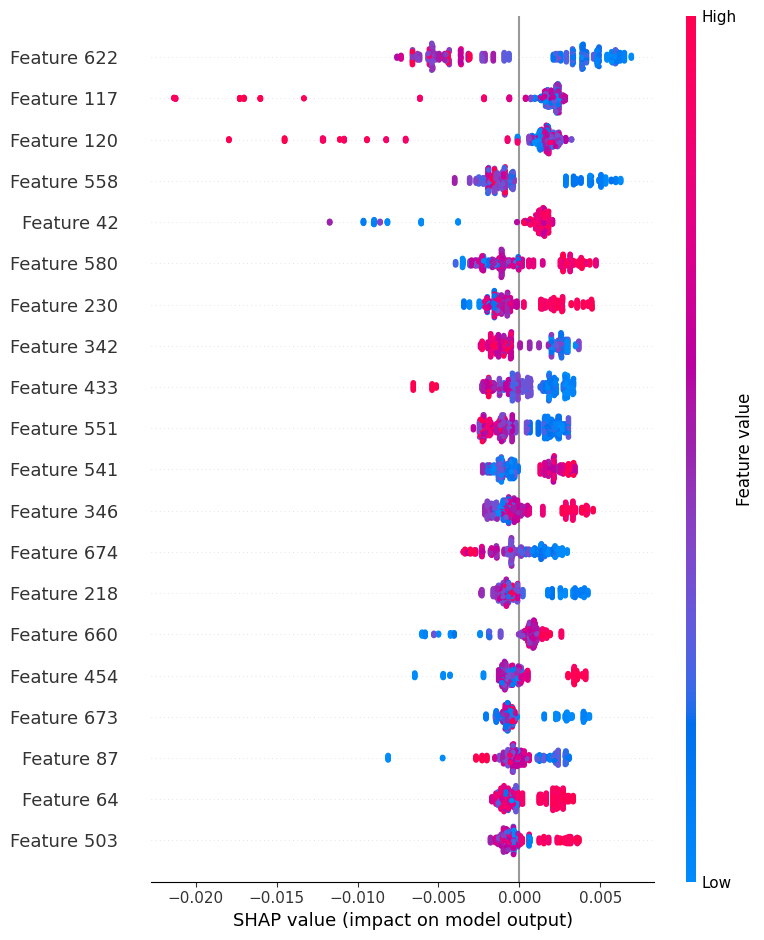

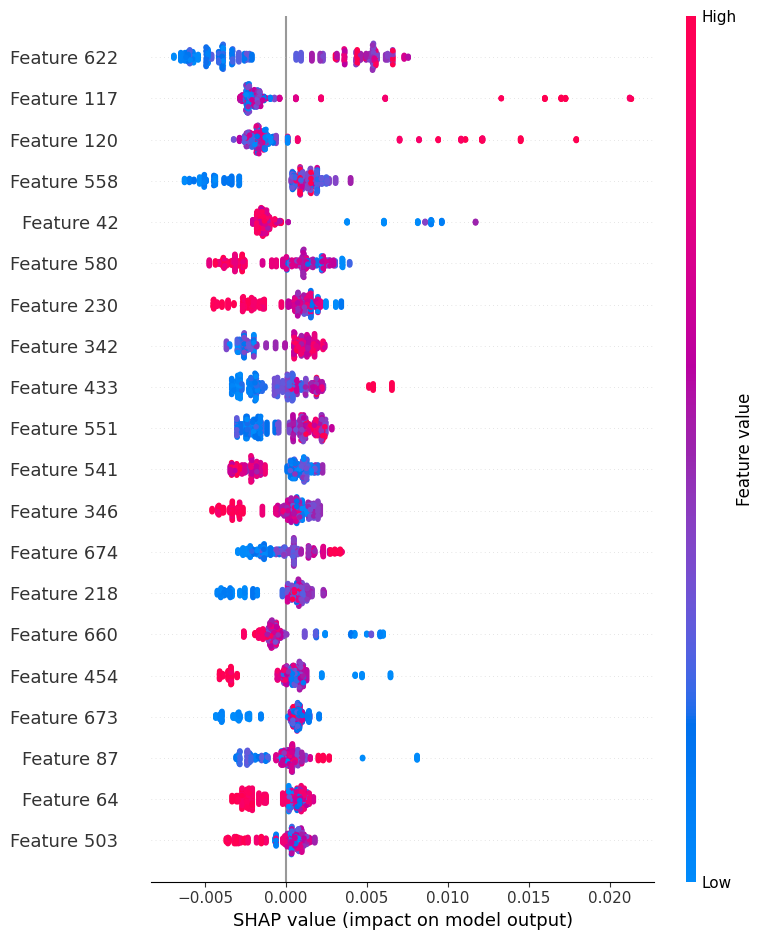

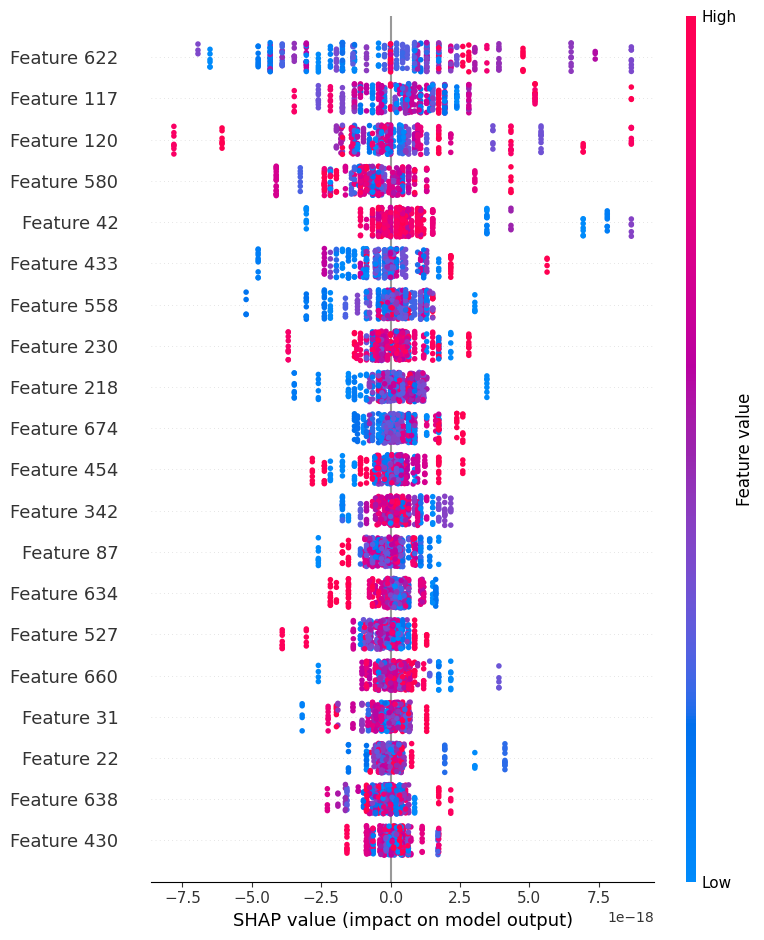

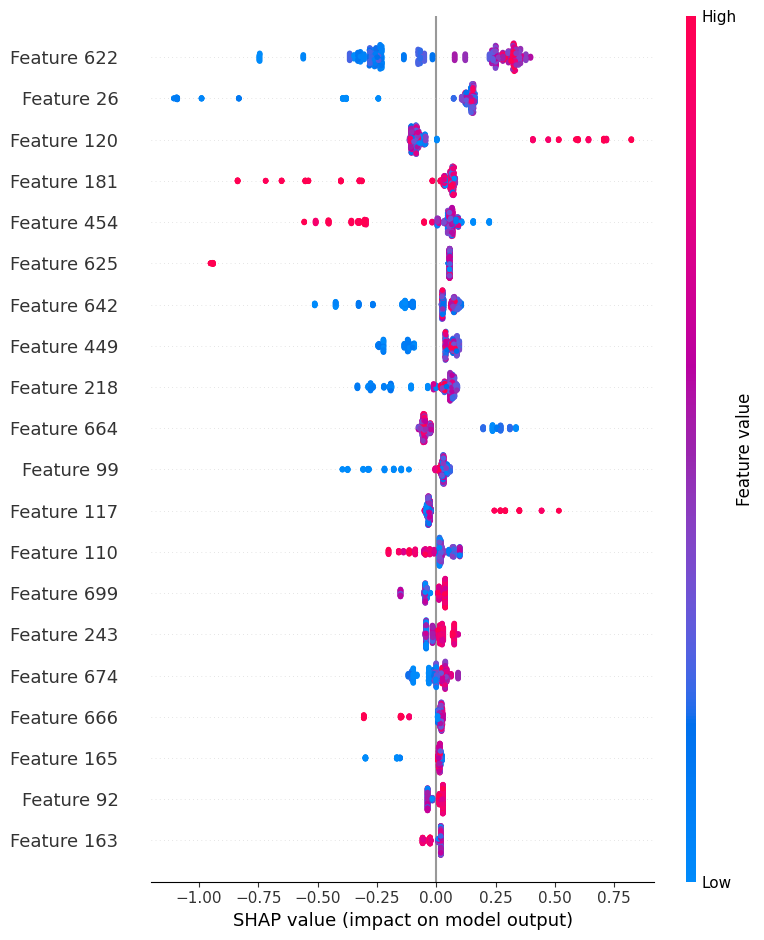

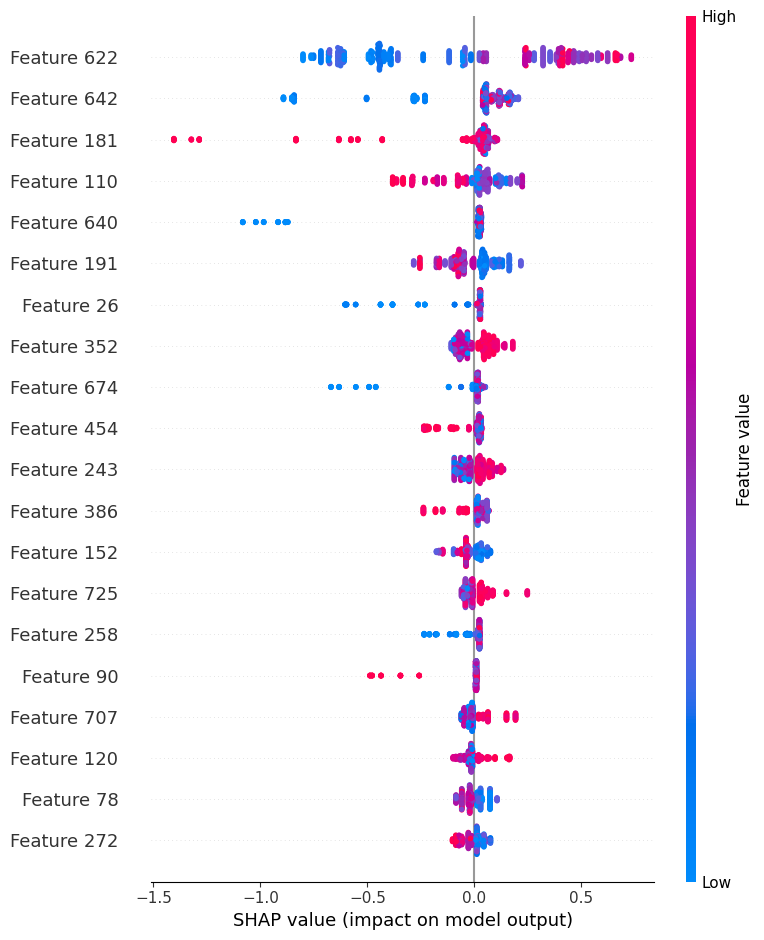

Prediction for Question 12: C
Prediction for Question 13: B
Prediction for Question 14: A
Prediction for Question 15: A
Metrics for Question 12:
Accuracy: 0.7232142857142857
Classification Report:
              precision    recall  f1-score     support
C              0.774510  0.908046  0.835979   87.000000
D              0.200000  0.080000  0.114286   25.000000
accuracy       0.723214  0.723214  0.723214    0.723214
macro avg      0.487255  0.494023  0.475132  112.000000
weighted avg   0.646271  0.723214  0.674887  112.000000
Confusion Matrix:
[[79  8]
 [23  2]]


Metrics for Question 13:
Accuracy: 0.7321428571428571
Classification Report:
              precision    recall  f1-score     support
B              0.784314  0.919540  0.846561   87.000000
C              0.200000  0.105263  0.137931   19.000000
D              0.000000  0.000000  0.000000    6.000000
accuracy       0.732143  0.732143  0.732143    0.732143
macro avg      0.328105  0.341601  0.328164  112.000000
weighted avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
# Import necessary libraries
# SHAP is used for model interpretability, Pandas for data manipulation, and Scikit-learn for machine learning tasks.
!pip install shap
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
import numpy as np  # For numerical operations
from transformers import BertTokenizer, BertModel  # For BERT embeddings
import torch  # For PyTorch operations, as BERT is based on PyTorch
from imblearn.combine import SMOTEENN  # For handling imbalanced datasets with a combination of SMOTE and ENN
from imblearn.pipeline import Pipeline as ImbPipeline  # For creating pipelines with imbalanced-learn components
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier  # Classifiers and ensemble models
from sklearn.model_selection import RandomizedSearchCV, cross_val_score  # For hyperparameter tuning and cross-validation
from sklearn.linear_model import LogisticRegression  # Logistic Regression model, used as a final estimator in stacking
from xgboost import XGBClassifier  # XGBoost classifier, a powerful gradient boosting model
import shap  # For model interpretability using SHAP values

# Step 1: Load the dataset
# The dataset is expected to be a CSV file containing job descriptions and responses to several questions.
file_path = 'Matrix_synthetic.csv'  # Update with your actual file path
data = pd.read_csv(file_path)

# Strip any trailing spaces from column names to prevent errors during data manipulation
data.columns = data.columns.str.strip()

# Prepare the data for model training
X = data['Job description']  # Features: job descriptions
y = data[['Question 12', 'Question 13', 'Question 14', 'Question 15']]  # Targets: responses to the questions

# Step 2: Encode the target variables
# The target variables are categorical, so we encode them using LabelEncoder to convert them into numerical form.
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # Dictionary to store label encoders for each target column
for column in y.columns:
    le = LabelEncoder()  # Initialize a LabelEncoder for each target column
    y[column] = le.fit_transform(y[column])  # Encode the target column
    label_encoders[column] = le  # Store the LabelEncoder for later use

# Step 3: Convert job descriptions to BERT embeddings
# BERT (Bidirectional Encoder Representations from Transformers) is used to convert the text data into embeddings.

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def embed_text(text):
    """
    Converts a given text into BERT embeddings.

    Args:
    text (str): The input text to embed.

    Returns:
    np.ndarray: A numpy array representing the BERT embedding of the input text.
    """
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():  # Disable gradient calculations for inference
        outputs = bert_model(**inputs)
    return outputs.pooler_output.detach().numpy().flatten()  # Return the flattened pooler output

# Convert all job descriptions to BERT embeddings
X_bert = np.array([embed_text(desc) for desc in X])

# Step 4: Split the data into training and testing sets
# The data is split into training (80%) and testing (20%) sets for model evaluation.
X_train, X_test, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42)

# Step 5: Create the pipeline with SMOTEENN and a classifier
# SMOTEENN is a combination of over-sampling (SMOTE) and under-sampling (ENN) techniques to handle class imbalance.
pipeline = ImbPipeline([
    ('over_under', SMOTEENN(random_state=42)),  # Address class imbalance
    ('classifier', RandomForestClassifier(random_state=42))  # Initial classifier: Random Forest
])

# Step 6: Hyperparameter tuning using RandomizedSearchCV
# RandomizedSearchCV is used for hyperparameter tuning, searching over specified parameter ranges.
param_dist = {
    'classifier__n_estimators': [50, 100, 200, 500],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'classifier__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Perform RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Conduct the search for a specific question (e.g., Question 12)
random_search.fit(X_train, y_train['Question 12'])
best_rf_model = random_search.best_estimator_  # Store the best model from the search
print(f"Best hyperparameters: {random_search.best_params_}")

# Step 7: Cross-validation and Stacking
# Stacking is an ensemble method where multiple models are trained and their predictions are combined by a final estimator.
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),  # Random Forest classifier
    ('gb', GradientBoostingClassifier(random_state=42)),  # Gradient Boosting classifier
    ('xgb', XGBClassifier(random_state=42, eval_metric='mlogloss'))  # XGBoost classifier with a specified evaluation metric
]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())  # Use Logistic Regression as the final estimator

# Perform cross-validation to evaluate the stacking classifier for 'Question 12'
cross_val_scores = cross_val_score(stacking_clf, X_train, y_train['Question 12'], cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {np.mean(cross_val_scores)}")

# Train the final stacking model on the full training set
stacking_clf.fit(X_train, y_train['Question 12'])

# Step 8: Model Interpretation using SHAP for Multi-Class Models
# SHAP (SHapley Additive exPlanations) is used to explain the output of machine learning models.

# Extract the RandomForest model from the best pipeline
rf_model_in_pipeline = best_rf_model.named_steps['classifier']

# Fit the RandomForest model (if not already done)
rf_model_in_pipeline.fit(X_train, y_train['Question 12'])

# Generate SHAP values for the RandomForest model
explainer_rf = shap.TreeExplainer(rf_model_in_pipeline)
shap_values_rf = explainer_rf.shap_values(X_train)

# Inspect SHAP values structure for understanding the dimensionality
print(f"Type of shap_values_rf: {type(shap_values_rf)}")
print(f"Shape of shap_values_rf: {shap_values_rf.shape}")
print(f"Shape of X_train: {X_train.shape}")

# Option 1: Plot SHAP values for a specific class (e.g., class 0)
shap_values_class_0 = shap_values_rf[:, :, 0]
shap.summary_plot(shap_values_class_0, X_train, feature_names=[f'Feature {i}' for i in range(X_train.shape[1])])

# Option 2: Plot SHAP values for another specific class (e.g., class 1)
shap_values_class_1 = shap_values_rf[:, :, 1]
shap.summary_plot(shap_values_class_1, X_train, feature_names=[f'Feature {i}' for i in range(X_train.shape[1])])

# Option 3: Average SHAP values across classes
shap_values_mean = shap_values_rf.mean(axis=2)
shap.summary_plot(shap_values_mean, X_train, feature_names=[f'Feature {i}' for i in range(X_train.shape[1])])

# Repeat SHAP analysis for other models in the stacking ensemble

# For Gradient Boosting Model
estimators_dict = dict(estimators)
gb_model = estimators_dict['gb']
gb_model.fit(X_train, y_train['Question 12'])
explainer_gb = shap.TreeExplainer(gb_model)
shap_values_gb = explainer_gb.shap_values(X_train)

# If SHAP values are returned as a list (one for each class), plot for each class
if isinstance(shap_values_gb, list):
    for class_idx, shap_vals in enumerate(shap_values_gb):
        print(f"SHAP summary plot for class {class_idx}")
        shap.summary_plot(shap_vals, X_train, feature_names=[f'Feature {i}' for i in range(X_train.shape[1])])
else:
    shap.summary_plot(shap_values_gb, X_train, feature_names=[f'Feature {i}' for i in range(X_train.shape[1])])

# For XGBoost Model
xgb_model = estimators_dict['xgb']
xgb_model.fit(X_train, y_train['Question 12'])
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_train)

# If SHAP values are returned as a list, plot for each class
if isinstance(shap_values_xgb, list):
    for class_idx, shap_vals in enumerate(shap_values_xgb):
        print(f"SHAP summary plot for class {class_idx}")
        shap.summary_plot(shap_vals, X_train, feature_names=[f'Feature {i}' for i in range(X_train.shape[1])])
else:
    shap.summary_plot(shap_values_xgb, X_train, feature_names=[f'Feature {i}' for i in range(X_train.shape[1])])

# Step 9: Predicting for a New Job Description
# Assume the new job description is stored in a variable
new_job_description = (
    "The Conference and Events Operations Supervisor is responsible for promoting and implementing "
    "commercial opportunities by coordinating conferences and events at Leeds Trinity. The role "
    "involves liaising with organizers to meet customer requirements, managing conference and accommodation "
    "bookings, developing relationships with local host families, and ensuring risk assessments are conducted "
    "for activities. The Supervisor also manages and trains staff, oversees the booking system, and provides "
    "data and reports to management. Additional duties include setting up rooms and equipment, facilitating "
    "online conferences, coordinating programs for key events, supporting sustainable practices, and maintaining "
    "up-to-date digital platforms. The role requires compliance with GDPR, health and safety policies, and the "
    "promotion of equity and social justice."
)

# Preprocess the new job description and convert it into BERT embeddings
new_X_bert = np.array([embed_text(new_job_description)])

# Use the trained model to predict the responses for the new job description
predictions = {}

for question in y.columns:
    best_model = random_search.best_estimator_  # Retrieve the best model from the pipeline
    prediction = best_model.predict(new_X_bert)  # Make the prediction
    predictions[question] = label_encoders[question].inverse_transform(prediction)[0]  # Convert the prediction back to the original label

# Display the predictions for the new job description
for question, prediction in predictions.items():
    print(f"Prediction for {question}: {prediction}")

# Step 10: Evaluation Metrics
# Calculate and display metrics for each question in the dataset

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

metrics = {}  # Dictionary to store the metrics for each question

for question in y.columns:
    best_model = random_search.best_estimator_  # Get the best model for this question
    y_pred = best_model.predict(X_test)  # Make predictions on the test set

    # Calculate accuracy
    accuracy = accuracy_score(y_test[question], y_pred)

    # Generate a classification report
    report = classification_report(y_test[question], y_pred, target_names=label_encoders[question].classes_, output_dict=True)

    # Generate a confusion matrix
    conf_matrix = confusion_matrix(y_test[question], y_pred)

    # Store the metrics
    metrics[question] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': conf_matrix
    }

# Display the metrics for each question
for question, metric in metrics.items():
    print(f"Metrics for {question}:")
    print(f"Accuracy: {metric['accuracy']}")
    print("Classification Report:")
    print(pd.DataFrame(metric['classification_report']).transpose())
    print("Confusion Matrix:")
    print(metric['confusion_matrix'])
    print("\n")
